This is the hello world program for tensorflow.  This basically just involves creating data that follows a line and then using a neural network model to fit this line.  For practise I implement the line using the functional API, the sequential api and using gradient tape.

Step 1 create the data

In [11]:
import tensorflow as tf
import numpy as np
import random

random.seed(10)

In [12]:
true_m = 2.0
true_b = -4.0

In [58]:
NUM_EXAMPLES = 1000 
NOISE_FACTOR = 20
xs = [random.uniform(-50, 50) for i in range(300)]


ys_pred = [true_m * x + true_b + (random.random() -0.5) *NOISE_FACTOR for x in xs]
xdata = np.array(xs)
ydata_pred = np.array(ys_pred)

In [59]:
# plotting the data
import matplotlib.pyplot as plt
import numpy as np

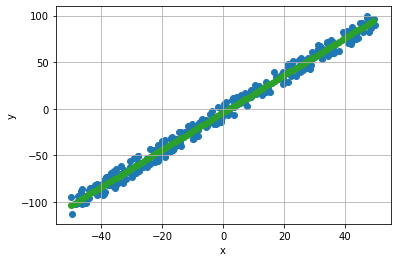

In [60]:
# True data expectation
t = np.arange(-50.0, 50.0, 1)
s = true_b + true_m * t

fig, ax = plt.subplots()
ax.scatter(xs, ydata_pred, c='tab:blue')
ax.scatter(t, s, c='tab:green')

ax.set(xlabel='x', ylabel='y')

ax.grid()
plt.show()


In [68]:
# define sequential model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(1,)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1, activation='relu')
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.MeanSquaredError(),
              metrics=['accuracy'])

model.fit(xdata, ydata_pred, epochs=5)


Epoch 1/5
10/10 [==============================] - 0s 900us/step - loss: 3172.8552 - accuracy: 0.0000e+00
Epoch 2/5
10/10 [==============================] - 0s 800us/step - loss: 3024.1555 - accuracy: 0.0000e+00
Epoch 3/5
10/10 [==============================] - 0s 700us/step - loss: 2888.9805 - accuracy: 0.0000e+00
Epoch 4/5
10/10 [==============================] - 0s 700us/step - loss: 2760.2842 - accuracy: 0.0000e+00
Epoch 5/5
10/10 [==============================] - 0s 700us/step - loss: 2618.1396 - accuracy: 0.0000e+00


In [69]:
y_calc = model.predict(t)

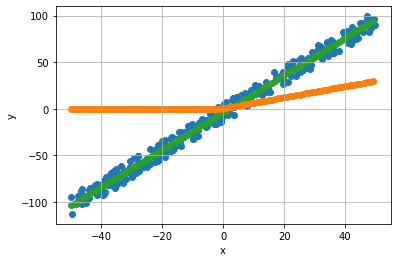

In [70]:
t = np.arange(-50.0, 50.0, 1)
s = true_b + true_m * t
y_calc = model.predict(t)

fig, ax = plt.subplots()
ax.scatter(xs, ydata_pred, c='tab:blue')
ax.scatter(t, s, c='tab:green')
ax.scatter(t, y_calc, c='tab:orange')

ax.set(xlabel='x', ylabel='y')

ax.grid()
plt.show()


In [67]:
print(y_calc)

[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.          0.          0